In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
!pip install scikit_posthocs orange3
#!git clone https://github.com/google/fuzzbench.git

#import sys
#sys.path.append("fuzzbench")
from fuzzbench_data import load_benchmarks

from analysis import data_utils

In [3]:
#@title Report data source
#report_directory = "2020-05-11"  #@param ["2020-05-11", "2020-04-21", "202-04-14", "2020-05-20-aflplusplus-2"] {allow-input: true}
#data_url = f"https://www.fuzzbench.com/reports/{report_directory}/data.csv.gz"
df = load_benchmarks()

/home/b/bdata/beandata/eth/projects_eth/eth-sm04-ast/repo/matt-AST/plots/fuzzbench_analysis/../../bean/benchmarks/report-data/exp-2022-04-22-00-58-08-libpng-1.2.56-4h-p52-thinkpad/data.csv.gz  not found


In [4]:
exp_snapshot_df = data_utils.get_experiment_snapshots(df)
exp_pivot_df = data_utils.experiment_pivot_table(exp_snapshot_df, data_utils.benchmark_rank_by_median)

# Median Edge Coverage 

In [5]:
exp_snapshot_df.pivot_table(index='benchmark', columns='fuzzer', values='edges_covered', aggfunc='median')

fuzzer,aflplusplus_ast_o0,aflplusplus_ast_o1,aflplusplus_ast_o2,aflplusplus_ast_o3
benchmark,,,,
bloaty_fuzz_target,5663,5969,5559,5535
freetype2-2017,19225,20855,20829,20049
lcms-2017-03-21,2701,2653,2976,2498
libpng-1.2.56,2085,2117,2072,2064
libxml2-v2.9.2,11896,12397,12157,11841
openthread-2019-12-23,5698,5816,5732,5828
sqlite3_ossfuzz,24644,24188,24762,24774
woff2-2016-05-06,1864,1887,1882,1877


# Current Fuzzbench default report ranking
- use the mean edges covered per benchmark
- rank each fuzzer by their mean ranking for all benchmarks

In [6]:
default_report_rank = data_utils.experiment_level_ranking(
    exp_snapshot_df, 
    data_utils.benchmark_rank_by_mean, 
    data_utils.experiment_rank_by_average_rank)
default_report_rank

fuzzer
aflplusplus_ast_o1    1.75
aflplusplus_ast_o2    1.75
aflplusplus_ast_o0    3.25
aflplusplus_ast_o3    3.25
Name: average rank, dtype: float64

## Other ranking measures
`exp_pivot_df` is the result of using the median coverage as a benchmark ranking algorithm
- Number of firsts (best median coverage for a benchmark)
- Percent coverage (median coverage / max coverage per benchmark)
- Average rank (simple mean of benchmark ranking)
- Statistical tests wins (only count cases where the coverage improvement was statistically significant (p_value < 0.05))

In [7]:
firsts_ranked = data_utils.experiment_rank_by_num_firsts(exp_pivot_df)
firsts_ranked

fuzzer
aflplusplus_ast_o1    5.0
aflplusplus_ast_o3    2.0
aflplusplus_ast_o2    1.0
aflplusplus_ast_o0    0.0
Name: number of wins, dtype: float64

In [8]:
percent_coverage = data_utils.experiment_rank_by_average_normalized_score(exp_pivot_df)
percent_coverage

fuzzer
aflplusplus_ast_o2    98.373035
aflplusplus_ast_o1    98.321902
aflplusplus_ast_o0    96.036245
aflplusplus_ast_o3    95.660506
Name: average normalized score, dtype: float64

In [9]:
average_rank = data_utils.experiment_rank_by_average_rank(exp_pivot_df)
average_rank

fuzzer
aflplusplus_ast_o1    1.75
aflplusplus_ast_o2    2.25
aflplusplus_ast_o0    3.00
aflplusplus_ast_o3    3.00
Name: average rank, dtype: float64

In [10]:
stats_wins = data_utils.experiment_level_ranking(
    exp_snapshot_df,
    data_utils.benchmark_rank_by_stat_test_wins,
    data_utils.experiment_rank_by_average_rank
)
stats_wins

fuzzer
aflplusplus_ast_o1    1.9375
aflplusplus_ast_o0    2.6875
aflplusplus_ast_o2    2.6875
aflplusplus_ast_o3    2.6875
Name: average rank, dtype: float64

# Ranking comparison chart

/tmp/ipykernel_405872/3032017555.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


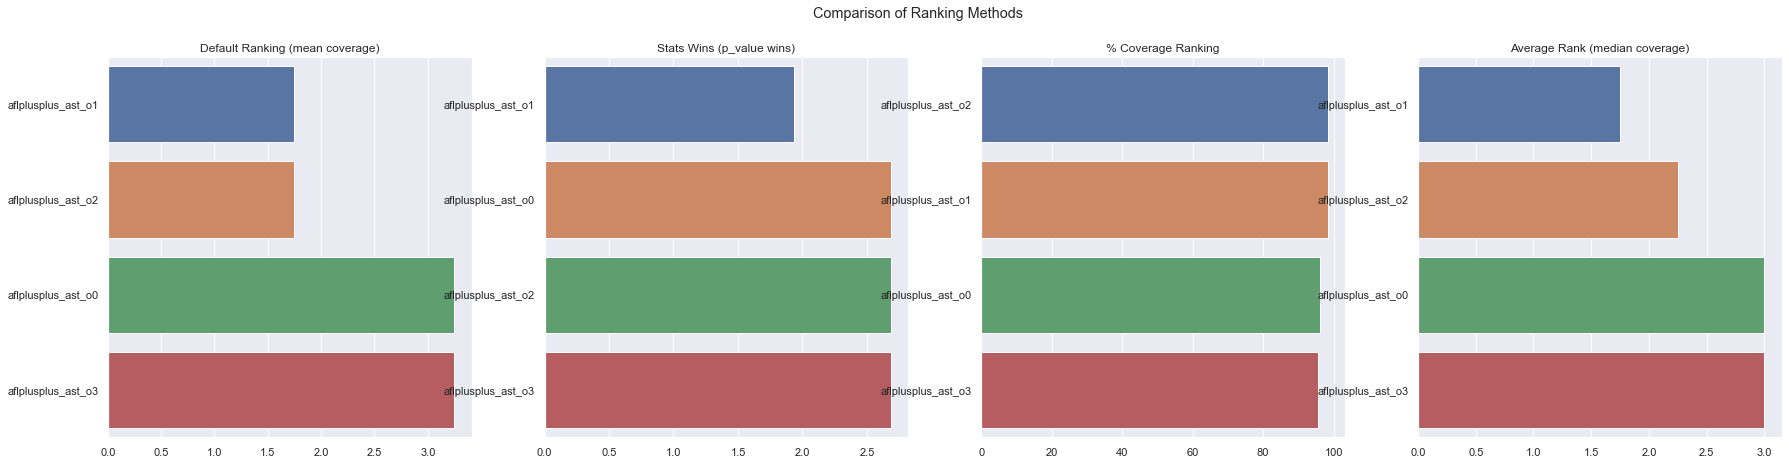

In [11]:
rankings = {
    "Default Ranking (mean coverage)": default_report_rank,
    "Stats Wins (p_value wins)": stats_wins,
    "% Coverage Ranking": percent_coverage,
    "Average Rank (median coverage)": average_rank
}

fig, axes = plt.subplots(1,len(rankings), figsize=(30,7))
for i, (title, ranking_series) in enumerate(rankings.items()):
  ax = sns.barplot(x=ranking_series.values, y=ranking_series.index, ax=axes[i])
  ax.set_title(title)
  ax.set_ylabel("")
fig.suptitle("Comparison of Ranking Methods")
fig.show()